In [1]:
# MCSB Bootcamp Day 6
# Leslie Heid
# Simulate a transcription factor diffusing inside the cytoplasm, searching
# for a nuclear pore complex

using PyPlot

In [2]:
# numerical parameters
dt = 0.001; # s
ntmax = 1e6;

NSample = 2000; # number of samples

# model parameters
D = 10; # microns^2/second
L = 10; # microns
NPCSize = 0.1; # microns
NPCLocation = [-L/2,0];

alpha = sqrt(2*D*dt);

# data collection
tCapture = zeros(NSample,1);

In [3]:
#=
# set up figure
figure(1);
plot(NPCLocation[1], NPCLocation[2], marker="o", color="orange")
ylim([-L/2,L/2])
xlim([-L/2,L/2])
xlabel("x (um)"); 
ylabel("y (um)");
=#

In [4]:
## Simulate!

@time begin
    
b = L/2 # saving some repetetive comp time

for iSample in 1:NSample
        
    # intial condition
    x = [b,0]
    
    t = 0;
    for nt in 1:ntmax
        
        # dynamics
        x = x + alpha*randn(2,1)
            
        # boundaries
        if x[1]>b
            x[1]=b
        elseif x[1]<-b
            x[1]=-b
        end
        
        if x[2]>b
            x[2]=b
        elseif x[2]<-b
            x[2]=-b
        end
        
        # test for NPC capture
        if ( (x[1]-NPCLocation[1])^2 + (x[2]-NPCLocation[2])^2 < NPCSize^2 )
            tCapture[iSample] = t
            break
        end

        t = t + dt
        
    end # finished loop through time  
end # finished loop through samples
end # stops timer

 25.425775 seconds (709.96 M allocations: 17.993 GiB, 5.61% gc time)


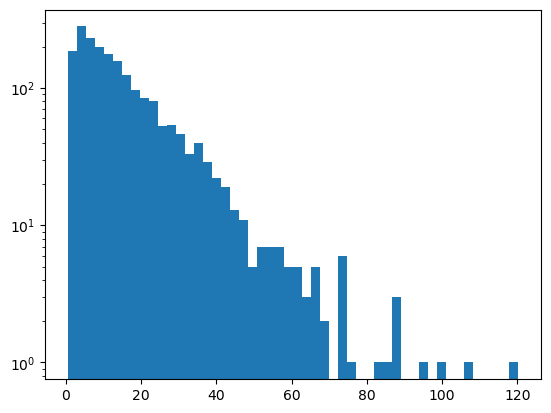

In [5]:
# analyze results
hist(tCapture, 50)
yscale("log")